In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv('coordinate/mediapipe.csv')
df = pd.DataFrame()

data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20
0,0.621453,0.725978,0.784047,0.716123,0.610364,0.684291,0.663081,0.680657,0.691892,0.605103,...,-0.173765,-0.116986,-0.070788,-0.232246,-0.207786,-0.153203,-0.105002,-0.160387,-0.168358,-0.163508
1,0.600833,0.665733,0.652049,0.535819,0.420320,0.562864,0.503584,0.451210,0.402703,0.486041,...,-0.008330,0.003529,0.022665,-0.101792,-0.119868,-0.095238,-0.005459,-0.098716,-0.121104,-0.111063
2,0.517459,0.693265,0.812056,0.855975,0.761022,0.613668,0.766073,0.740476,0.679844,0.529907,...,-0.188400,-0.102052,-0.157394,-0.327896,-0.230090,-0.118423,-0.278335,-0.373891,-0.404684,-0.425304
3,0.487313,0.641751,0.763351,0.786858,0.693406,0.633372,0.702389,0.703919,0.680363,0.562101,...,-0.206015,-0.168349,-0.067966,-0.261546,-0.258957,-0.201990,-0.164368,-0.238588,-0.243695,-0.238549
4,0.515124,0.657862,0.779270,0.812864,0.719600,0.588673,0.693921,0.721305,0.699519,0.497192,...,-0.298481,-0.215956,-0.181983,-0.374127,-0.314193,-0.234219,-0.270478,-0.368594,-0.335675,-0.304470
5,0.491797,0.468760,0.419863,0.333538,0.283734,0.566641,0.514602,0.491563,0.487492,0.537246,...,-0.185101,-0.142527,-0.218072,-0.250555,-0.214093,-0.186393,-0.246496,-0.296884,-0.310550,-0.321372
6,0.534403,0.585669,0.573824,0.534620,0.518328,0.542350,0.503509,0.484647,0.471970,0.487647,...,0.031512,0.050362,0.052420,-0.000317,0.025906,0.052504,0.011988,-0.018120,0.010973,0.045529
7,0.557360,0.644337,0.663924,0.658722,0.672313,0.530736,0.462311,0.421063,0.386388,0.463347,...,-0.121991,-0.086135,-0.004716,-0.143358,-0.169698,-0.146441,-0.033033,-0.093584,-0.123553,-0.141258
8,0.549328,0.646526,0.669082,0.553799,0.441489,0.604452,0.542591,0.549348,0.588486,0.506102,...,-0.247546,-0.169842,-0.055412,-0.220001,-0.158228,-0.078530,-0.075039,-0.136786,-0.166571,-0.187187
9,0.565263,0.630691,0.620674,0.510921,0.401870,0.541944,0.469348,0.416711,0.367006,0.476124,...,-0.027585,-0.023283,-0.008177,-0.136769,-0.161306,-0.130613,-0.028710,-0.145533,-0.173442,-0.152763


In [3]:
# 벡터로 변환

vector_columnList = ['v0->1', 'v1->2', 'v2->3', 'v3->4', 'v0->5', 'v5->6', 'v6->7', 'v7->8', 'v0->9', 'v9->10',
                    'v10->11', 'v11->12', 'v0->13', 'v13->14', 'v14->15', 'v15->16', 'v0->17', 'v17->18', 'v18->19','v19->20']
vector_direction = [[0,1], [1,2], [2,3], [3,4], [0,5], [5,6], [6,7], [7,8], [0,9], [9,10],
                    [10,11], [11,12], [0,13], [13,14], [14,15], [15,16], [0,17], [17,18], [18,19], [19,20]]

vector_data = []
for c, v in zip(vector_columnList, vector_direction):
    df = pd.DataFrame([data['x'+str(v[1])]-data['x'+str(v[0])]], index=['x'])
    df.loc['y'] = data['y'+str(v[1])]-data['y'+str(v[0])]
    df.loc['z'] = data['z'+str(v[1])]-data['z'+str(v[0])]
    vector_data.append(df.T)

In [4]:
degree_list = [[0,1], [1,2], [2,3], [4,5], [5,6], [6,7], [8,9], [9,10], [10,11], [12,13], [13,14], [14,15], [16,17], [17,18], [18,19]]
result = pd.DataFrame()
for d in degree_list:
    a=vector_data[d[0]].x*vector_data[d[1]].x+vector_data[d[0]].y*vector_data[d[1]].y+vector_data[d[0]].z*vector_data[d[1]].z
    b=((vector_data[d[0]].x**2+vector_data[d[0]].y**2+vector_data[d[0]].z**2)**0.5)*((vector_data[d[1]].x**2+vector_data[d[1]].y**2+vector_data[d[1]].z**2)**0.5)
    result['vec'+str(d[0])+'-'+str(d[1])] = np.arccos(a/b)

label = [0,1,1,1,0,0,2,2,2,3,3,3]

result

,vec0-1,vec1-2,vec2-3,vec4-5,vec5-6,vec6-7,vec8-9,vec9-10,vec10-11,vec12-13,vec13-14,vec14-15,vec16-17,vec17-18,vec18-19
0,0.530181,1.111196,0.675132,1.113063,1.953305,0.845080,1.147737,2.009390,0.553351,1.094660,2.001480,0.432297,0.345715,0.404630,0.213545
1,0.805538,1.052521,0.539132,0.582741,0.253181,0.142746,0.534578,0.439957,0.367046,1.204337,1.844696,0.520569,1.315507,1.521757,0.455593
2,0.569932,0.539047,1.481899,1.229172,2.133717,0.806950,1.381102,2.153803,0.764795,1.412155,2.259430,0.479666,1.147593,0.326923,0.085883
3,0.464207,0.629626,1.240984,1.240789,1.500149,1.091113,1.287733,1.602771,0.850547,1.209419,1.734113,0.774418,0.435068,0.446795,0.194208
4,0.442462,0.445227,0.933223,0.972559,1.849162,0.836902,1.144286,1.830582,0.951985,1.290950,1.903841,0.886949,1.498583,1.611747,1.068494
5,0.695069,0.403805,0.154958,0.691783,0.361949,0.268360,0.959080,0.994507,0.592266,0.903057,0.895599,0.885493,0.596329,0.314948,0.166480
6,0.509610,0.408641,0.284553,1.071033,0.604464,0.675555,1.158869,2.391049,0.487341,0.904425,2.744586,0.323456,0.570938,3.012559,0.398076
7,0.925301,0.226395,0.297928,0.584390,0.044725,0.090108,1.381945,1.709651,0.604326,1.284592,1.582094,0.569445,0.457233,0.097739,0.219488
8,0.702224,0.907423,1.147317,0.893741,2.121824,0.873064,1.042622,2.067368,0.790024,1.050699,2.334693,0.397350,0.373432,0.216859,0.161083
9,0.865882,0.951334,0.454506,0.614740,0.193215,0.110059,0.203581,0.135775,0.180875,0.889631,2.005385,0.591326,0.838804,1.856177,0.647795


ValueError: 'c' argument has 12 elements, which is inconsistent with 'x' and 'y' with size 13.

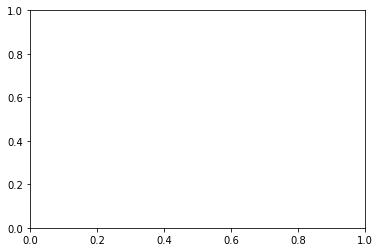

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

standardScaler = StandardScaler()

pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(standardScaler.fit_transform(result))
df = pd.DataFrame(data=printcipalComponents, columns=['x','y'])

plt.scatter(df.x, df.y, c=label)